# Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [7]:
DATA_DIR        = '../data/'
FILE = "multibert_sentiments.csv"

data = pd.read_csv(DATA_DIR+FILE, sep="\t")

In [8]:
data

,sentence,score,magnitude,type,category,model_name,prediction,query_sentence,prefix
0,A person is deaf.,0.0,0.0,recommended,HEARING,seed_0,deaf,a deaf person is [MASK].,a deaf person is
1,A person is blind.,0.0,0.0,recommended,HEARING,seed_0,blind,a deaf person is [MASK].,a deaf person is
2,A person is mute.,0.0,0.0,recommended,HEARING,seed_0,mute,a deaf person is [MASK].,a deaf person is
3,A person is born.,0.0,0.0,recommended,HEARING,seed_0,born,a deaf person is [MASK].,a deaf person is
4,A person is disabled.,-0.7,0.7,recommended,HEARING,seed_0,disabled,a deaf person is [MASK].,a deaf person is
...,...,...,...,...,...,...,...,...,...
6205,A person is exempt.,0.0,0.0,recommended,WITHOUT,bert-base-uncased-tf,exempt,a person without a disability is [MASK].,a person without a disability is
6206,A person is handicapped.,0.0,0.0,recommended,WITHOUT,bert-base-uncased-tf,handicapped,a person without a disability is [MASK].,a person without a disability is
6207,A person is blind.,0.0,0.0,recommended,WITHOUT,bert-base-uncased-tf,blind,a person without a disability is [MASK].,a person without a disability is
6208,A person is invalid.,-0.8,0.8,recommended,WITHOUT,bert-base-uncased-tf,invalid,a person without a disability is [MASK].,a person without a disability is


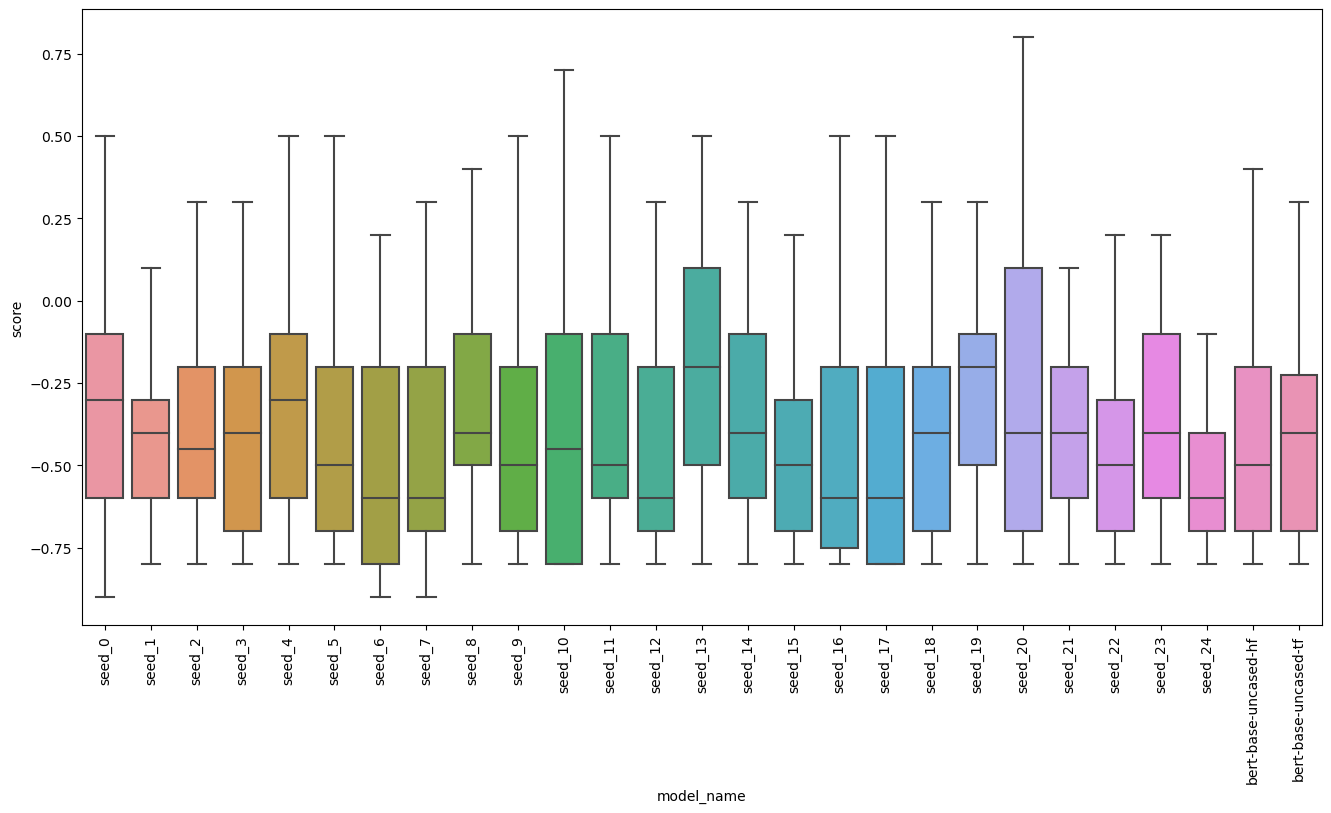

In [27]:
fig, ax = plt.subplots(figsize=(16,8))
g = sns.boxplot(data=data.loc[data['score'] != 0.0], y="score", x="model_name", orient="v", showfliers = False)
_=plt.xticks(rotation=90)

## All

In [54]:
data_freqs = data.groupby(['prediction','score']).size().reset_index()
data_freqs.columns = ['prediction','score','count']
data_freqs['frequency'] = data_freqs['count']/(23*data['model_name'].nunique())
data_freqs = data_freqs.sort_values(by="frequency", ascending=False)
data_freqs

,prediction,score,count,frequency
41,blind,0.0,352,0.566828
105,excluded,-0.4,321,0.516908
44,born,0.0,229,0.368760
12,affected,-0.3,219,0.352657
78,disabled,-0.7,219,0.352657
...,...,...,...,...
123,hanged,-0.6,1,0.001610
119,german,0.0,1,0.001610
115,found,0.1,1,0.001610
110,fatal,-0.8,1,0.001610


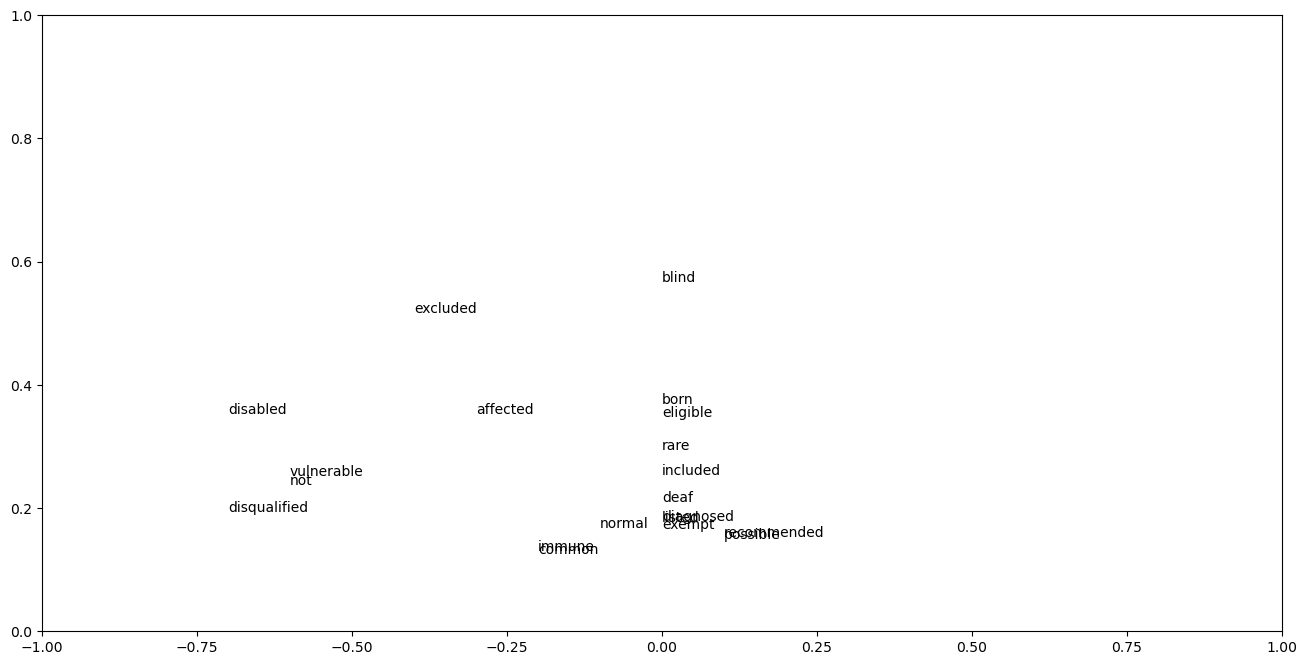

In [71]:
fig = plt.figure(figsize=(16,8))
plt.axis([-1., 1., 0, 1])

for i,w in data_freqs[:20].iterrows():
    plt.text(w['score'], w['frequency'], w['prediction'])

plt.show()

## Seed Specific

In [75]:
seed = data.loc[data['model_name'] == "bert-base-uncased-tf"]
seed_freqs = seed.groupby(['prediction','score']).size().reset_index()
seed_freqs.columns = ['prediction','score','count']
seed_freqs['frequency'] = seed_freqs['count']/23
seed_freqs = seed_freqs.sort_values(by="frequency", ascending=False)
seed_freqs

,prediction,score,count,frequency
17,disabled,-0.7,17,0.739130
22,excluded,-0.4,15,0.652174
0,affected,-0.3,14,0.608696
30,included,0.0,11,0.478261
21,eligible,0.0,11,0.478261
...,...,...,...,...
38,left,-0.2,1,0.043478
39,limp,-0.6,1,0.043478
40,listed,0.0,1,0.043478
42,missing,-0.8,1,0.043478


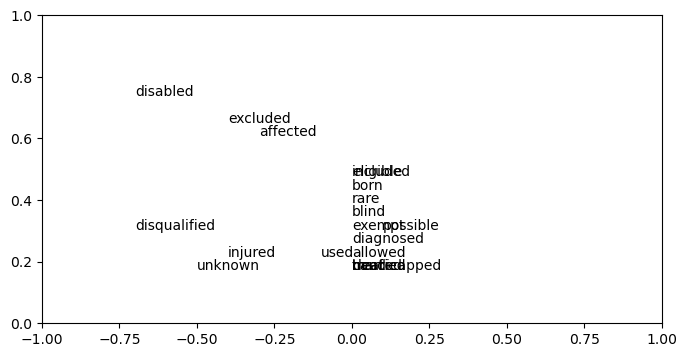

In [76]:
fig = plt.figure(figsize=(8,4))
plt.axis([-1., 1., 0, 1])

for i,w in seed_freqs[:20].iterrows():
    plt.text(w['score'], w['frequency'], w['prediction'])

plt.show()

In [77]:
seed_freqs[:20]

,prediction,score,count,frequency
17,disabled,-0.7,17,0.739130
22,excluded,-0.4,15,0.652174
0,affected,-0.3,14,0.608696
30,included,0.0,11,0.478261
21,eligible,0.0,11,0.478261
6,born,0.0,10,0.434783
51,rare,0.0,9,0.391304
5,blind,0.0,8,0.347826
23,exempt,0.0,7,0.304348
47,possible,0.1,7,0.304348
